# <center>Radial Basis Function (RBF) Implementation</center>
<center>Ankush Bhayekar (gq8442)</center>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import breast cancer dataset as pandas dataframe and checking if there are any NaN columns

<AxesSubplot:>

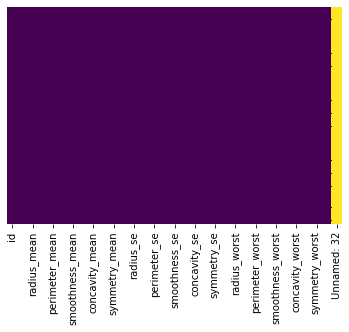

In [37]:
data = pd.read_csv('data.csv')

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dropping unnamed-32 NaN column and 'id' column. Keeping id column in the dataset doesn't make sense as all the rows have different ids and there is no relation between id and other features

In [43]:
data.drop([data.columns[-1], data.columns[0]],axis=1,inplace=True)

<AxesSubplot:>

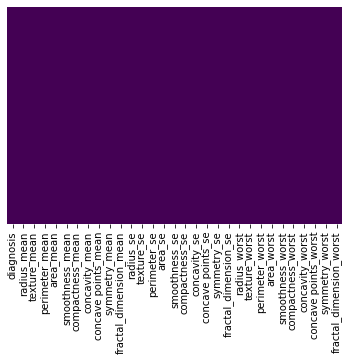

In [45]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No NaN data as seen before. We can now go ahead and use this data in our algorithm

In [ ]:
# Data set extraction by deleting first and last columns
data = np.loadtxt('./data.txt', delimiter=',', usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))

# Initializing k values
k = [2, 3, 4, 5, 6, 7, 8]
plot = np.zeros(len(k))
size = data.shape[0]


def k_means():
    for i in k:
        centroid = np.zeros([i, 9])
        for j in range(i):
            # Dividing the data from mid point into two parts
            data1 = random.randint(1, int(size / 2))
            data2 = random.randint(int(size / 2), size - 1)
            centroid[j] = np.average(data[data1:data2], axis=0)

        # Initializing distance and creating copy of centroids with zeros
        distance = np.zeros([size, i])
        centroid_copy = np.zeros(centroid.shape)

        while np.sum(centroid - centroid_copy) != 0:
            centroid_copy[:, :] = centroid[:, :]

            for j in range(i):
                distance[:, j] = np.linalg.norm((data - centroid[j]), axis=1)
                classification = np.argsort(distance, axis=1)
                classification = np.delete(classification, np.arange(1, i), 1)

                arrange = np.reshape(np.argsort(classification, axis=0), data.shape[0])

                data1 = 0
                potential = 0
                for j in range(data.shape[0] - 1):
                    if classification[arrange[j]] != classification[arrange[j + 1]]:
                        data2 = j + 1
                        centroid[classification[arrange[j]]] = np.average(data[arrange[data1:data2]], axis=0)
                        potential += np.sum(np.square(
                            np.linalg.norm(data[arrange[data1:data2]] - centroid[classification[arrange[j]]], axis=1)))
                        data1 = data2

                centroid[classification[arrange[j - 1]]] = np.average(data[arrange[data1:data.shape[0]]], axis=0)
                potential += np.sum(np.square(
                    np.linalg.norm(data[arrange[data1:data.shape[0]]] - centroid[classification[arrange[j - 1]]],
                                   axis=1)))
            plot[k.index(i)] = potential
    print(plot)


k_means()

mpl.plot(k, plot, color='red', marker='*')
mpl.xlabel('K')
mpl.ylabel('L(K)')
mpl.title('K means algorithm')
mpl.show()

In [13]:
def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def k_means_centroid(X, k, max_iters):
  
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    converged = False
    
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]

## <center>Creating ($x_i$, $y_i$) by drawing the data such that $x_i\epsilon\mathscr{N}(0, \sigma^2)$ and $y_i$ as below </center>
$$y_i = w^T . x_i + \epsilon_i ........ Eq(1)$$ 
$d = 1000, n = 500, \sigma^2 = 1, k = 100$
<br>
$\epsilon_i$ is some Gaussian Noise aaded to the $y_i$ and it is drawn over $\mathscr{N}(0, \sigma^2)$ with the size equal to $n$

In [2]:
class RBF:

    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

### Creating a function for soft threshold and for inner loop to loop over all the features in data set
The inner loop solved for the $d$ values such that $k_{it} = [1,.....,d]$. Important note here - Since $k < d$, the feature $k+1$ through $d$ are unneccessary and potentially even harmful for predicting $y$

In [46]:
def fit(self):

    self.centroids, self.std_list = k_means_centroid(self.X, self.k, max_iters=1000)

    if not self.std_from_clusters:
        dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
        self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

    RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)

    self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

    RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)

    self.pred_ty = RBF_list_tst @ self.w

    self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

    diff = self.pred_ty - self.ty

    print('Accuracy: ', len(np.where(diff == 0)[0]) / len(diff))

### Solving final solution - Inner and outer loops
*Outer loop is for the range of lambda values*
<br>
*Inner loop is for each feature or coordinate*
$$ \lambda = [70,....., 0.01]$$ 
The max value of lambda is choosen by trial and error such that zero features are selected and min value selected such that all the features are approximately selected

In [56]:
data = np.load('mnist_targets.npy').astype(float)

## Solution with all the features - relevant and irrelevant $j = [1,...,d]$

In [55]:
data = np.load('mnist_data.npy').astype(float)

train_y = data[0:5000, 0]
train_x = data[0:5000, 1:]

test_y = data[0:1000, 0]
test_x = data[0:1000, 1:]

RBF_CLASSIFIER = RBF(train_x, train_y, test_x, test_y, num_of_classes=10,
                     k=500, std_from_clusters=False)

RBF_CLASSIFIER.fit()

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_data.npy'

## Conclusion 1:
As seen in the plot of regularization paths and number of non-zero elements, we can conclude that,
> 1. The features in $d$ which are irrelevant ( meaning they lie between $k+1$ through $d$ ) are becoming zero for lower $\lambda$ value. 
<br> 
> 2. Since $k=100$, there are almost 900 features which are irrelevant. Becuase of this, the region near to lower $\lambda$ and lower $weights$ is densely populated.
<br>
> 3. The features which are relevant from $[0,....,k]$ are eliminated at higher $\lambda$ values.
> 4. Looking at the second plot of 'number of non-zero elements' we can confirm that as the $\lambda$ increases the number of non-zero elements decreases.


## Optional : Solution with only relevant features i.e. $j = [1,....,k]$

## Conclusion 2:
> In the first plot we can see that features which are not relevant are not considered in the solution and most of the features are eliminated at higher $\lambda$ - meaning that the features considered in this iteration $j=[1,....,k]$, have more weightage and important to predict the value of $y$
<br><br>
> The second plot shows that when the regression is solved only for relevant features, the number of non-zero elements in the lower range of $\lambda$ remains same i.e. $d=1000$